<a href="https://colab.research.google.com/github/weireagan/reaganpython/blob/master/%E7%A5%9E%E7%B6%93%E7%B6%B2%E8%B7%AF4/14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
%tensorflow_version

Currently selected TF version: 2.x
Available versions:
* 1.x
* 2.x


In [4]:
%tensorflow_version 2. x

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2. x`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


In [0]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [0]:
import tensorflow as tf

In [0]:
from tensorflow.keras.datasets import fashion_mnist

In [8]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

這是 Dress


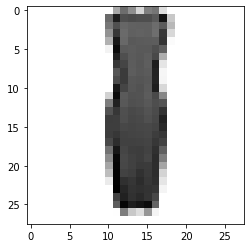

In [10]:
n = 59
print('這是', class_names[y_train[n]])
plt.imshow(x_train[n], cmap='Greys');

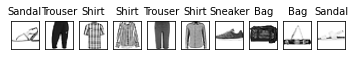

In [11]:
pick = np.random.choice(60000, 10, replace=False)

for i in range(10):
    n = pick[i]
    ax = plt.subplot(1,10,i+1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(class_names[y_train[n]], fontsize=10)
    plt.imshow(x_train[n], cmap='Greys') 

In [12]:
x_train.shape

(60000, 28, 28)

In [13]:
x_test.shape

(10000, 28, 28)

#CNN 要注意一張圖有多少個 channel, 因為只有灰階, 所以只有一個 channel。
#因此我們要轉資料格式:(28,28) --> (28, 28, 1)

In [0]:
x_train = x_train.reshape(60000,28,28,1)/255

In [0]:
x_test = x_test.reshape(10000,28,28,1)/255

In [0]:
from tensorflow.keras.utils import to_categorical

In [0]:
y_train = to_categorical(y_train, 10)

In [0]:
y_test = to_categorical(y_test, 10)

In [19]:
y_train[n]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)


#打造CNN函數學習機


In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.optimizers import SGD

In [0]:
model = Sequential()

In [0]:
model.add(Conv2D(100,(4,4),padding='same',
         input_shape=(28,28,1),
         activation='relu'))

In [0]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [0]:
model.add(Conv2D(200,(4,4),padding='same',
                activation='relu'))

In [0]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [0]:
model.add(Conv2D(400,(4,4),padding='same',
                activation='relu'))

In [0]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [0]:
model.add(Flatten())

In [0]:
model.add(Dense(50,activation='relu'))

In [0]:
model.add(Dense(100,activation='relu'))

In [0]:
model.add(Dense(10,activation='softmax'))

In [0]:
model.compile(loss = 'mse', optimizer = SGD(lr = 0.078), metrics = ['accuracy'])

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 100)       1700      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 100)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 200)       320200    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 200)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 400)         1280400   
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 400)         0         
_________________________________________________________________
flatten (Flatten)            (None, 3600)              0

In [45]:
final=model.fit(x_train, y_train, batch_size = 100, epochs = 20)

Epoch 1/20
600/600 [==============================] - 17s 28ms/step - loss: 0.0200 - accuracy: 0.8623
Epoch 2/20
600/600 [==============================] - 17s 28ms/step - loss: 0.0196 - accuracy: 0.8664
Epoch 3/20
600/600 [==============================] - 17s 29ms/step - loss: 0.0192 - accuracy: 0.8693
Epoch 4/20
600/600 [==============================] - 18s 30ms/step - loss: 0.0189 - accuracy: 0.8702
Epoch 5/20
600/600 [==============================] - 18s 30ms/step - loss: 0.0186 - accuracy: 0.8735
Epoch 6/20
600/600 [==============================] - 18s 30ms/step - loss: 0.0183 - accuracy: 0.8755
Epoch 7/20
600/600 [==============================] - 18s 30ms/step - loss: 0.0179 - accuracy: 0.8778
Epoch 8/20
600/600 [==============================] - 18s 30ms/step - loss: 0.0176 - accuracy: 0.8802
Epoch 9/20
600/600 [==============================] - 18s 30ms/step - loss: 0.0174 - accuracy: 0.8822
Epoch 10/20
600/600 [==============================] - 18s 30ms/step - loss: 0.017

In [0]:
result = model.predict_classes(x_test)

神經網路預測:  Shirt


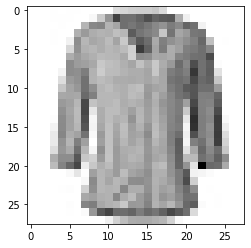

In [51]:
n=4
print('神經網路預測: ',class_names[result[n]])
plt.imshow(x_test[n].reshape(28,28), cmap = 'Greys')

#驗證模型對錯
#將顏色改成紅色


這是 Shirt
神經網路預測是 Shirt


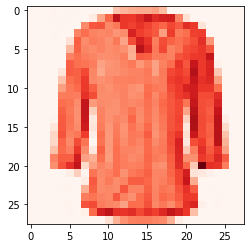

In [58]:
from numpy import argmax
result = model.predict_classes(x_test) 

print('這是', class_names[argmax(y_test[n])])
print('神經網路預測是', class_names[result[n]])
plt.imshow(x_test[n].reshape(28,28), cmap = 'Reds')

#準確度驗證

In [53]:
score = model.evaluate(x_test, y_test)
loss, acc = score
print('測試資料的準確度', acc )


313/313 [==============================] - 1s 4ms/step - loss: 0.0171 - accuracy: 0.8848
測試資料的準確度 0.8848000168800354


#將準確率用圖畫出

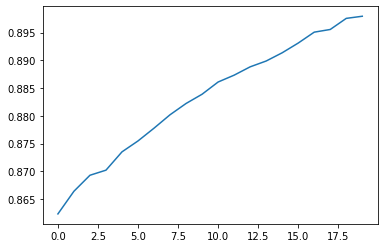

In [54]:
plt.plot(final.history['accuracy'])